# What will we do?


### <font color='289C4E'>Shortcut<font><a class='anchor' id='top'></a>
0. [Initial Setup](#0)
   - [Import Libraries](#0.1)
   - [Load Data](#0.2)
1. [EDA](#1)
2. [Handle Missing Values](#2)
3. [Feature Engineering](#3)
4. [Linear Regression](#4)
5. [Logistic Regression](#5)
6. [Scaling](#6)
7. [KNN Classifier](#7)
8. [Support Vector Machine (SVM)](#8)
9. [Kernelize SVM](#9)
10. [Decision Tree](#10)
11. [Random Forest](#11)
12. [Submitting the solutions](#12)

Hyperparameter Tuning: تحسين أداء النماذج باستخدام Grid Search أو Random Search.
Conclusion and Recommendations: تقديم الاستنتاجات والتوصيات بناءً على نتائج التحليل.

# 0 Initial Setup <a class='anchor' id='0'></a>


### <font >0.1_import libraries<font><a class='anchor' id='0.1'></a>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from statistics import mode
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder
import re

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

from IPython.display import display, HTML


### <font >0.2_load data<font><a class='anchor' id='0.2'></a>


In [4]:
train = pd.read_csv(r"C:\Users\ayd31\OneDrive\Desktop\database\gender_submission\train.csv")
test = pd.read_csv(r'C:\Users\ayd31\OneDrive\Desktop\database\gender_submission\test.csv')
full_data = [train, test]

# 1. EDA <a class='anchor' id='1'></a>


**First, let's get a general idea about data dimensions**

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable Name | Description
--------------|-------------
Survived      | Survived (1) or died (0)
Pclass        | Passenger's class
Name          | Passenger's name
Sex           | Passenger's sex
Age           | Passenger's age
SibSp         | Number of siblings/spouses aboard
Parch         | Number of parents/children aboard
Ticket        | Ticket number
Fare          | Fare
Cabin         | Cabin
Embarked      | Port of embarkation

In [6]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**It looks like we have null values**

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
print(f'Unique Values in SibSp : {train.Pclass.unique()}')

Unique Values in SibSp : [3 1 2]


In [8]:
print(f'unique values in Embarked {train.Embarked.unique()}')

unique values in Embarked ['S' 'C' 'Q' nan]


**We will use the chart to get a clearer idea**

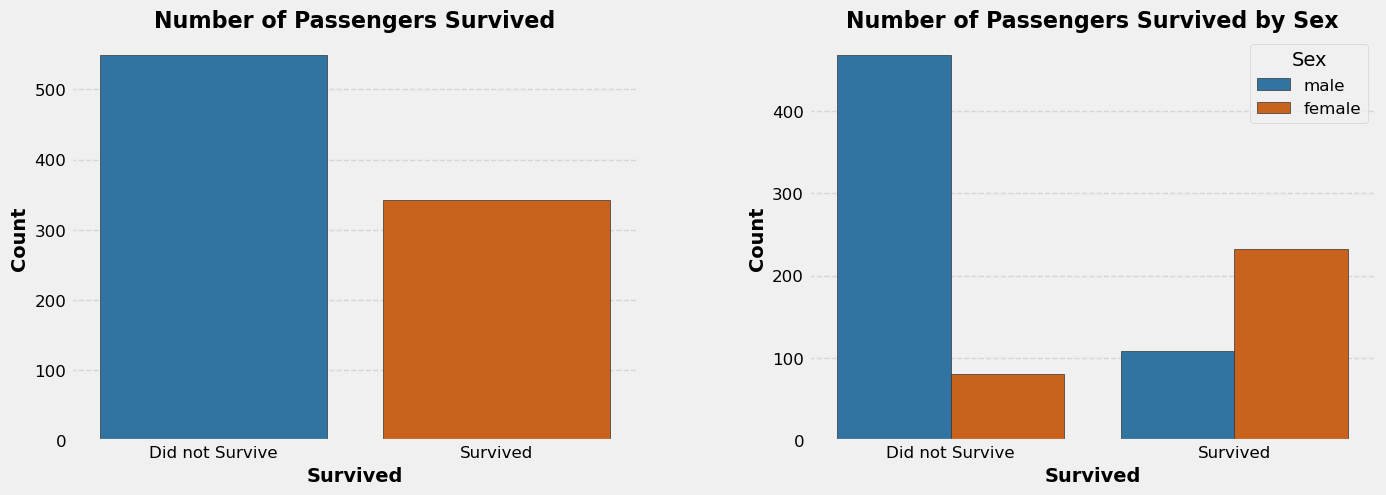

In [9]:
palette = ['#1f77b4', '#e65c00'] 
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Survived', data=train, palette=palette, edgecolor='.2')
plt.title('Number of Passengers Survived', fontsize=16, fontweight='bold')
plt.xlabel('Survived', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Did not Survive', 'Survived'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.countplot(x='Survived', hue='Sex', data=train, palette=palette, edgecolor='.2')
plt.title('Number of Passengers Survived by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Survived', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Did not Survive', 'Survived'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sex', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplots_adjust(wspace=0.3)

plt.show()


**So the plot says we have more number of non-survived people and females are more likely to survived than male!. so, 'Sex' looks like a very strong explanatory variable, and it can be good choice for our model!**

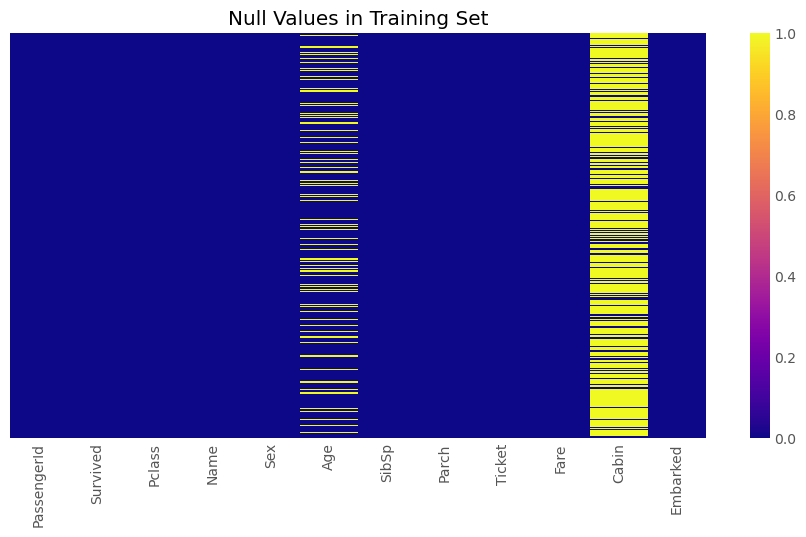

In [10]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull(), yticklabels=False, cmap='plasma')
plt.title('Null Values in Training Set')
plt.show()


**We will be dealling with null values later on.**

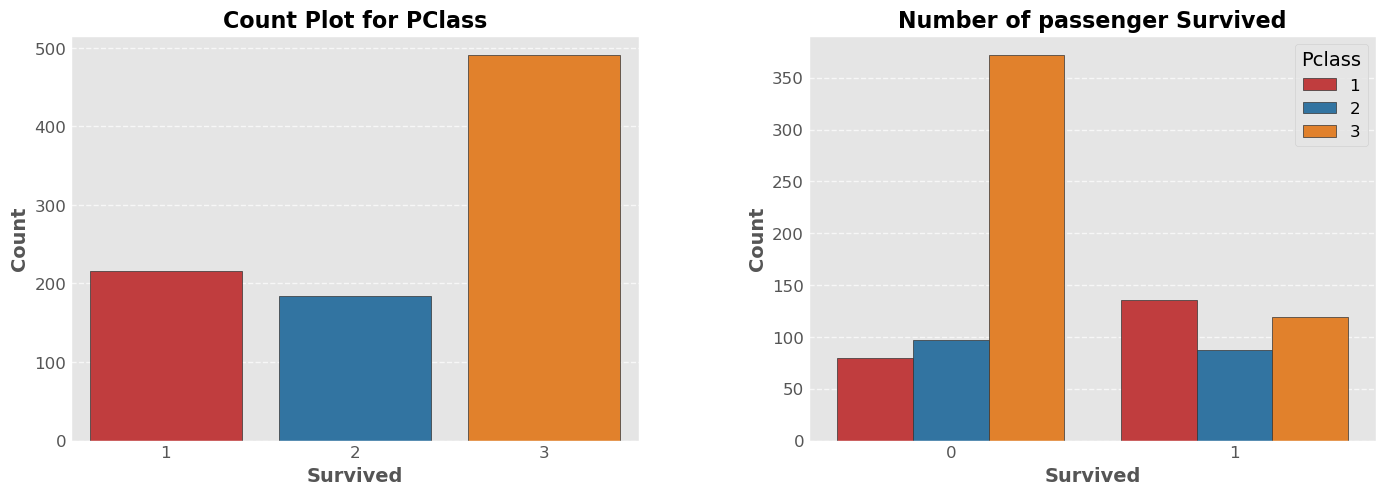

In [11]:
palette = ['#d62728', '#1f77b4', '#ff7f0e']
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Pclass', data=train, palette=palette, edgecolor='.2')
plt.title('Count Plot for PClass', fontsize=16, fontweight='bold')
plt.xlabel('Survived', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks([0, 1,2], ['1','2','3'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.countplot(x='Survived', hue='Pclass', data=train, palette=palette, edgecolor='.2')
plt.title('Number of passenger Survived', fontsize=16, fontweight='bold')
plt.xlabel('Survived', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['0','1'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Pclass', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplots_adjust(wspace=0.3)

plt.show()


looking at some satistical data!

In [12]:
pclass1 = train[train.Pclass == 1]['Survived'].value_counts(normalize=True).values[0]*100
pclass2 = train[train.Pclass == 2]['Survived'].value_counts(normalize=True).values[1]*100
pclass3 = train[train.Pclass == 3]['Survived'].value_counts(normalize=True).values[1]*100

print("Lets look at some satistical data!\n")
print("Pclaas-1: {:.1f}% People Survived".format(pclass1))
print("Pclaas-2: {:.1f}% People Survived".format(pclass2))
print("Pclaas-3: {:.1f}% People Survived".format(pclass3))

Lets look at some satistical data!

Pclaas-1: 63.0% People Survived
Pclaas-2: 47.3% People Survived
Pclaas-3: 24.2% People Survived


**Pclass is also a good feature to train our model.**

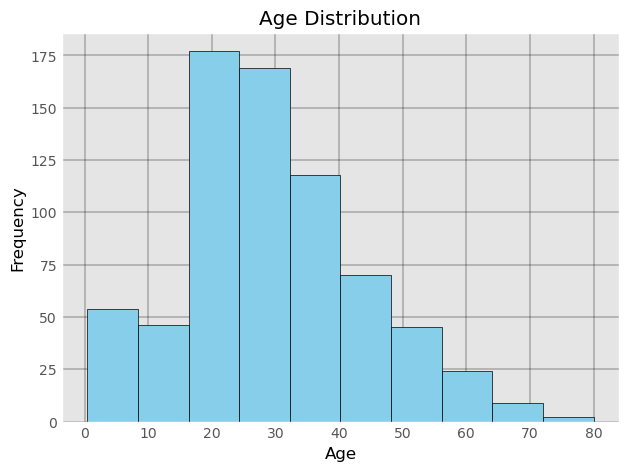

In [13]:
plt.hist(train['Age'], color='skyblue', edgecolor='black')

plt.grid(color='black', linewidth=0.3) 

plt.title('Age Distribution', color='black') 
plt.xlabel('Age', color='black') 
plt.ylabel('Frequency', color='black') 

plt.show()


Text(0.5, 1.0, 'Age Distribution')

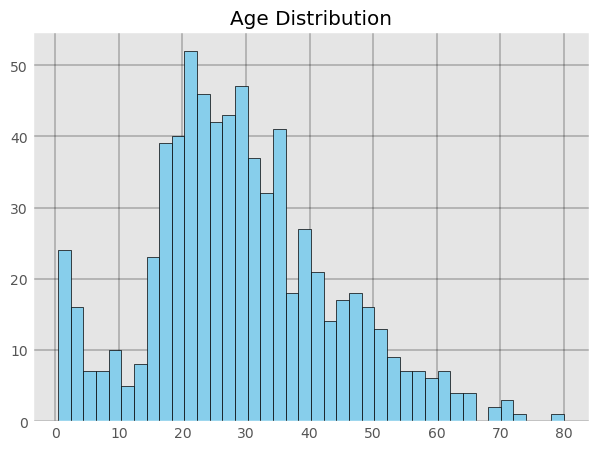

In [14]:
train['Age'].hist(bins=40,edgecolor='black',color="skyblue");
plt.grid(color='black', linewidth=0.3)
plt.title('Age Distribution')

**Age column has non-uniform data and many outliers**

**Outlier** : An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

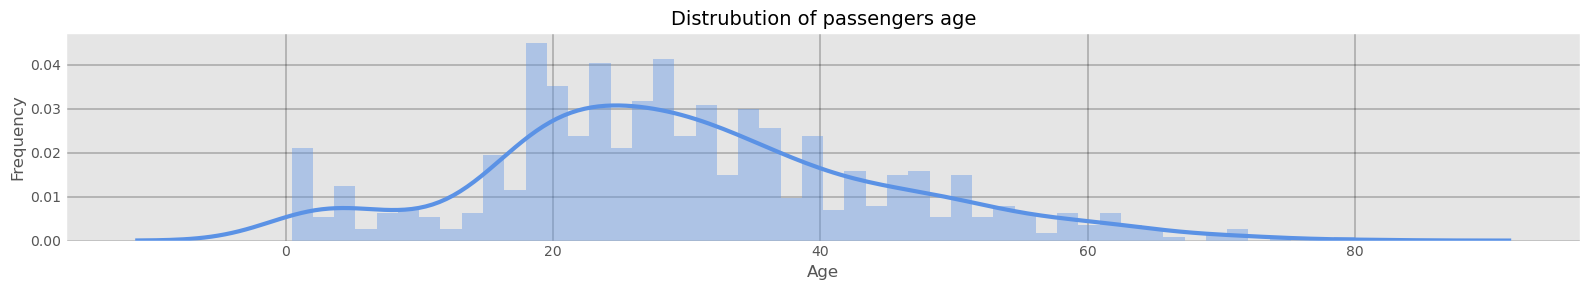

In [15]:
# set plot size
plt.figure(figsize=(16, 3))

# plot a univariate distribution of Age observations 
sns.distplot(train[(train["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50,color="#5B92E5")
plt.grid(color='black', linewidth=0.3)

# set titles and labels
plt.title('Distrubution of passengers age',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

**Age by surviving status**

Did age had a big influence on chances to survive?
To visualize two age distributions, grouped by surviving status I am using boxlot and stripplot showed together:

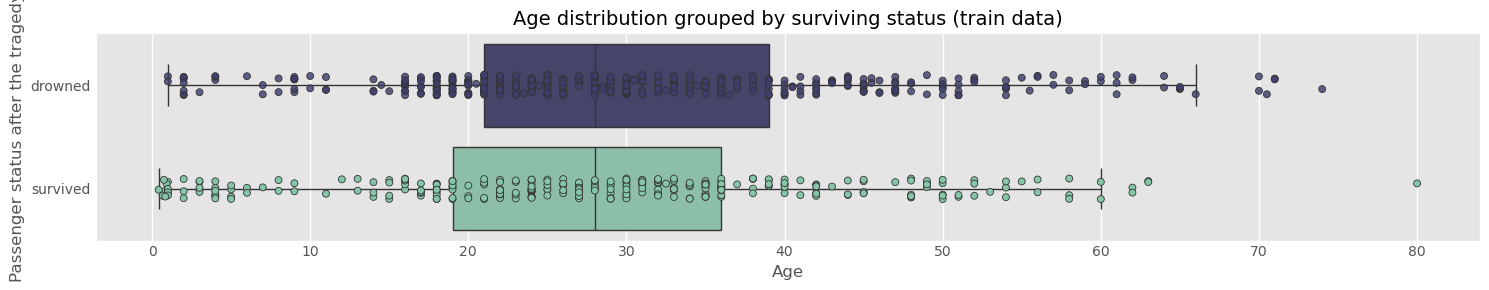

In [16]:
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'Survived', x = 'Age', data = train,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'Survived', x = 'Age', data = train,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

**Let's look at Number of siblings/spouses aboard**

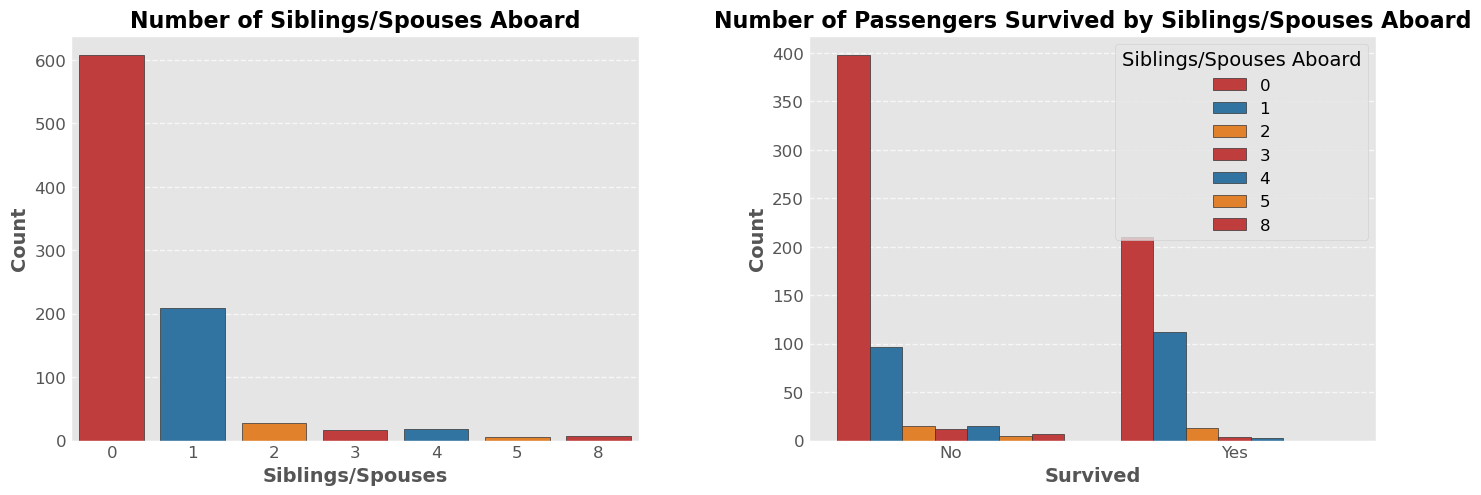

In [17]:
palette = ['#d62728', '#1f77b4', '#ff7f0e']

plt.figure(figsize=(15, 5))

# Plot 1: Number of siblings/spouses aboard
plt.subplot(1, 2, 1)
sns.countplot(x='SibSp', data=train, palette=palette, edgecolor='.2')
plt.title('Number of Siblings/Spouses Aboard', fontsize=16, fontweight='bold')
plt.xlabel('Siblings/Spouses', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.countplot(x='Survived', hue='SibSp', data=train, palette=palette, edgecolor='.2')
plt.title('Number of Passengers Survived by Siblings/Spouses Aboard', fontsize=16, fontweight='bold')
plt.xlabel('Survived', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Siblings/Spouses Aboard', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust space between plots
plt.subplots_adjust(wspace=0.3)

plt.show()


**Looks like single person Non-survived count is almost double than survived, while others have 50-50 % ratio**

**Now Looking at Port of embarkation**

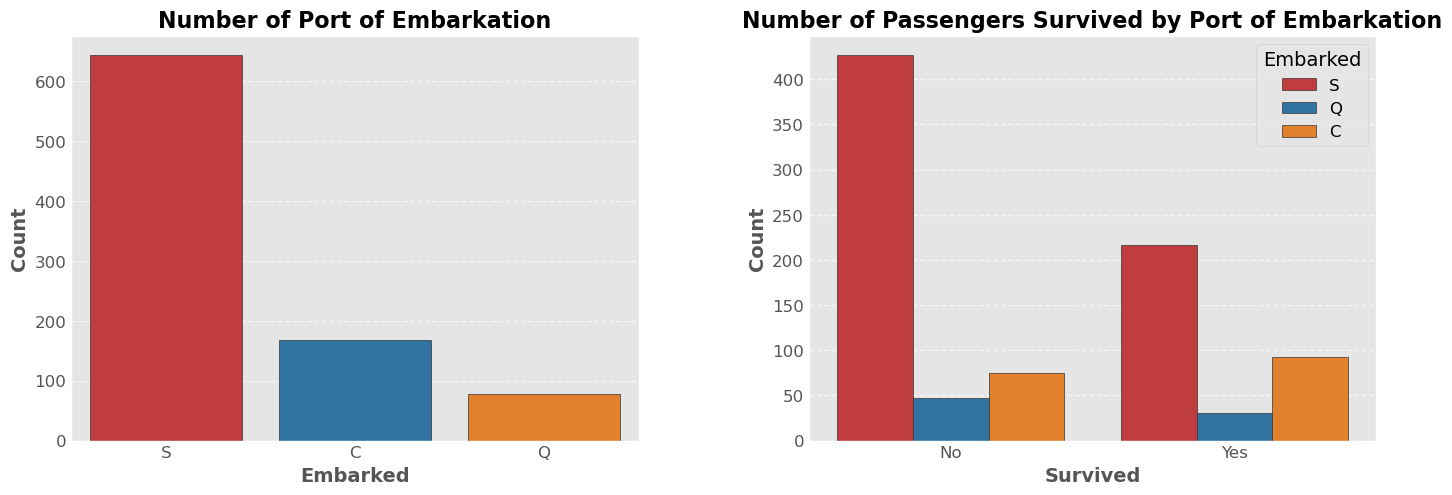

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Embarked', data=train, palette=palette, edgecolor='.2')  # Ensure 'x' is specified
plt.title('Number of Port of Embarkation', fontsize=16, fontweight='bold')
plt.xlabel('Embarked', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.countplot(x='Survived', hue='Embarked', data=train, palette=palette, edgecolor='.2')
plt.title('Number of Passengers Survived by Port of Embarkation', fontsize=16, fontweight='bold')
plt.xlabel('Survived', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Embarked', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplots_adjust(wspace=0.3)

plt.show()


**Can't say much!**

**Look in to relationships among dataset**

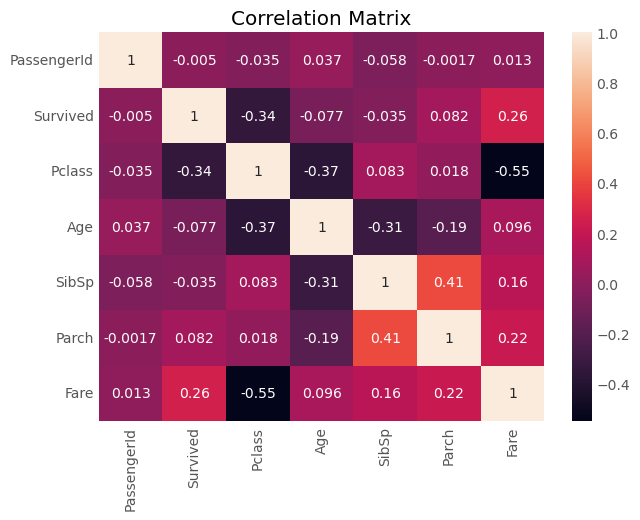

In [19]:
numeric_df = train.select_dtypes(include=['number'])

# Plot the correlation matrix heatmap
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Matrix')

plt.show()


**Configure the heatmap**

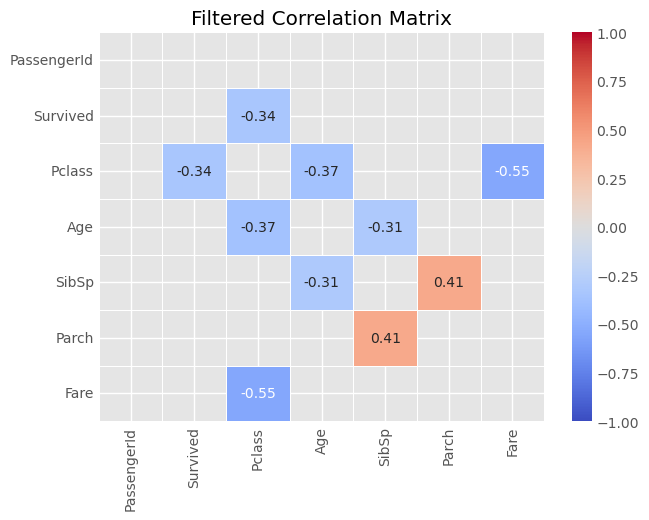

In [20]:
numeric_df = train.select_dtypes(include=['number'])

corr = numeric_df.corr()

mask = (corr >= 0.3) | (corr <= -0.3)
mask = mask & (corr != 1)  
filtered_corr = corr.copy()
filtered_corr[~mask] = None  

sns.heatmap(filtered_corr, annot=True, linewidths=.5, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Filtered Correlation Matrix')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

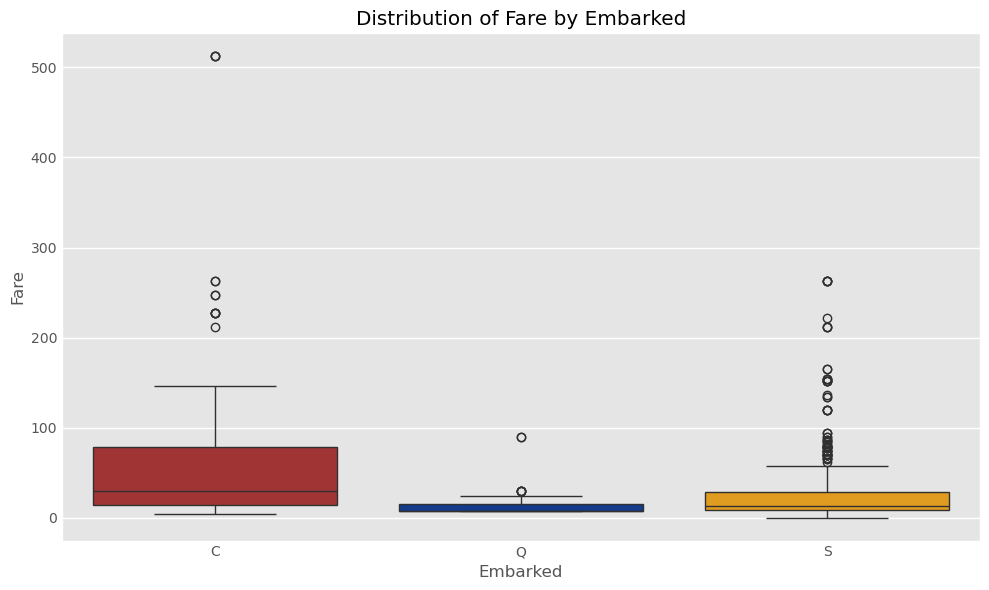

In [21]:
plt.figure(figsize=(10, 6))
palette=['#B22222','#0033A0','orange']
sns.boxplot(x="Embarked", y="Fare", data=train, order=['C', 'Q', 'S'],palette=palette)
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()
plt.show

- Wider fare distribution is observed among passengers who embarked in Cherbourg (C). This makes sense as many first-class passengers boarded the ship here, but there is also a significant share of third-class passengers.

- Smallest variation in fare prices is seen for passengers who boarded in Queenstown (Q). Additionally, the average fare for these passengers is the lowest, likely because the journey was supposed to be the shortest, and nearly all passengers were from the third class.

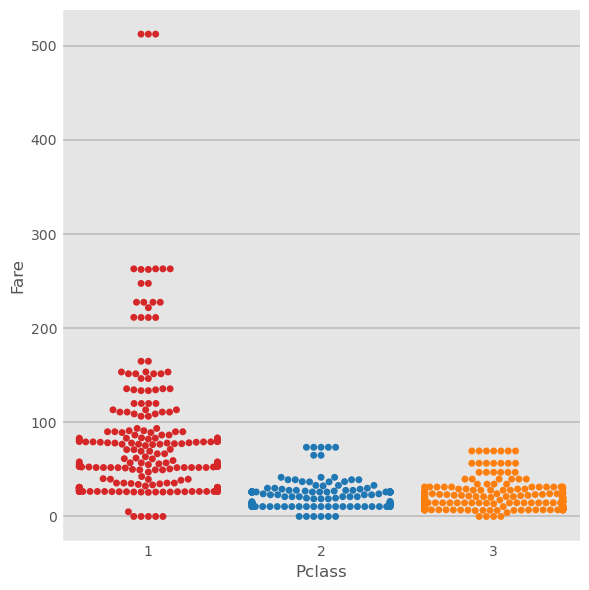

In [22]:
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=train,
                palette= ['#d62728', '#1f77b4', '#ff7f0e'],height = 6)
plt.grid(True, axis='y', alpha=0.7,color='black',linewidth=.3)
plt.tight_layout()

We can observe that the distribution of prices for the second and third class is very similar. The distribution of first-class prices is very different, has a larger spread, and on average prices are higher.

Let's add colours to our points to indicate surviving status of passenger (there will be only data from training part of the dataset):

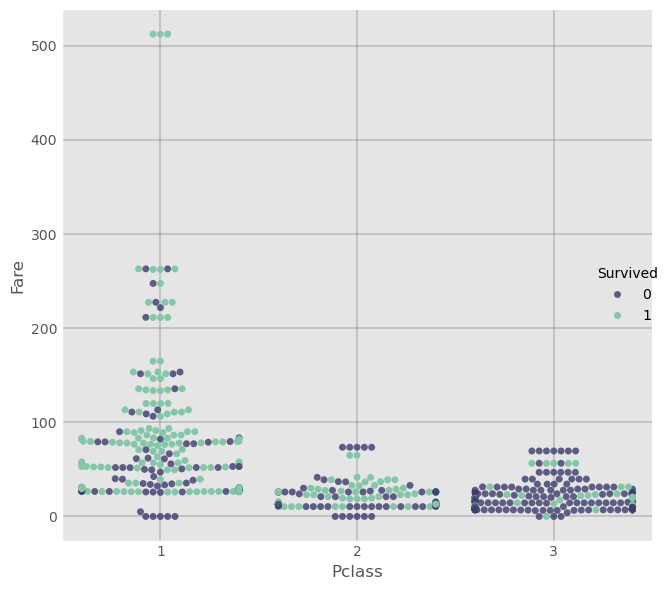

In [23]:
sns.catplot(x="Pclass", y="Fare",  hue = "Survived", kind="swarm", data=train, 
                                    palette=["#3f3e6fd1", "#85c6a9"], height = 6)
plt.grid(True, alpha=0.7,color='black',linewidth=.3)

plt.tight_layout()

Let's look at some maximum and minimum values of features!

Text(0, 0.5, 'Fare')

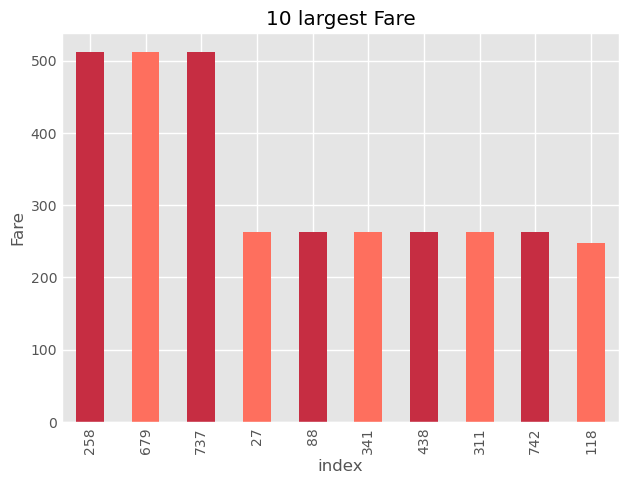

In [24]:
train['Fare'].nlargest(10).plot(kind='bar',title='10 largest Fare',color= ['#C62D42', '#FE6F5E']);
plt.xlabel('index')
plt.ylabel('Fare')

<Axes: title={'center': '10 largest Age'}>

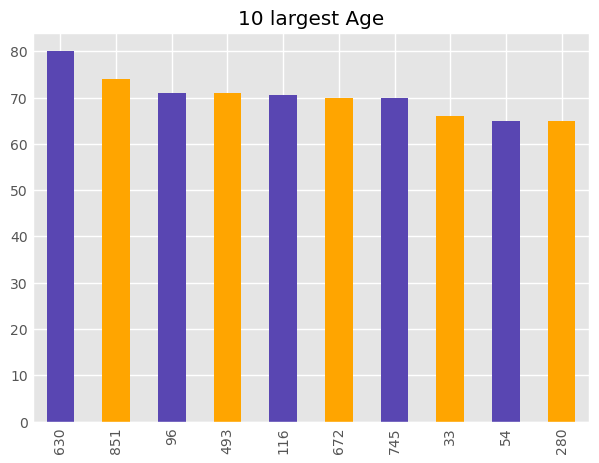

In [25]:
train['Age'].nlargest(10).plot(kind='bar',title='10 largest Age',color=['#5946B2','#FFA500'])

# 2 Handle Missing Values <a class='anchor' id='2'></a>


**Great! We've now completed our data exploration and gained some valuable insights. Next, we'll proceed with data cleaning before moving on to model building.**

> *We will replace missing values with the most frequent values*

In [10]:
for dataset in full_data:
    dataset['Age'] = dataset['Age'].apply(lambda x: dataset['Age'].median() if pd.isna(x) else x)    
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Fare'] = dataset['Fare'].apply(lambda x: dataset['Fare'].median() if pd.isna(x) else x)

In [11]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

> So many different values let's place missing values with U as "Unknown"

In [12]:
train['Cabin'] = train['Cabin'].fillna('U')
test['Cabin'] = test['Cabin'].fillna('U')

# 3. Feature Engineering <a class='anchor' id='3'></a>


> Sex is categorical data so we can replace male to 0 and femail to 1

In [13]:
train['Sex'][train['Sex'] =='male']=0
train['Sex'][train['Sex'] =='female']=1

> Let's encode with OneHotEncoder technique

In [14]:
encoder=OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
train = train.join(temp)
train.drop(columns='Embarked',inplace=True)

In [18]:
train.Cabin.tolist()[0:20]

['U',
 'C',
 'U',
 'C',
 'U',
 'U',
 'E',
 'U',
 'U',
 'U',
 'G',
 'C',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U']

> We can get the alphabets by running regular expression

In [19]:
train['Cabin'] = train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['Cabin'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [20]:
sorted(train['Cabin'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U']

In [21]:
cabin_category ={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':7,'U':8}
train['Cabin']=train['Cabin'].map(cabin_category)
test['Cabin']=train['Cabin'].map(cabin_category)

### What is in the name?
Each passenger Name value contains the title of the passenger which we can extract and discover.
To create new variable "Title":

- I am using method 'split' by comma to divide Name in two parts and save the second part
- I am splitting saved part by dot and save first part of the result
- To remove spaces around the title I am using 'split' method
- To visualize, how many passengers hold each title, I chose countplot.

In [22]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [23]:
train['Name'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
test['Name'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [24]:
train['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

**Wohh that's lot's of title. So, let's bundle them**


In [25]:
train.rename(columns={'Name' : 'Title'}, inplace=True)
train['Title'] = train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
test.rename(columns={'Name' : 'Title'}, inplace=True)
test['Title'] = test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [26]:
train['Title'].value_counts(normalize = True) * 100

Title
Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: proportion, dtype: float64

Better! let's convert to numeric

In [27]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Title']]).toarray())
train = train.join(temp)
train.drop(columns='Title', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Title']]).toarray())
test = test.join(temp)
test.drop(columns='Title', inplace=True)

Hmmm... but we know from part 2 that Sibsp is the number of siblings / spouses aboard the Titanic, and Parch is the number of parents / children aboard the Titanic... So, what is another straightforward feature to engineer?
Yes, it is the size of each family aboard!


In [28]:
train['familySize'] = train['SibSp'] + train['Parch'] + 1
test['familySize'] = test['SibSp'] + test['Parch'] + 1

In [29]:
# Drop redundant features
train = train.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)
test = test.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,S,C,Q,0,1,2,3,4,familySize
0,1,0,3,0,22.0,7.2500,8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,2,1,1,1,38.0,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,3,1,26.0,7.9250,8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,3,0,35.0,8.0500,8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


## PCA(Principle component analysis)

let’s visualize our final dataset by implementing PCA and plot the graph

In [31]:
train = pd.DataFrame(train)

train.columns = train.columns.astype(str)

columns_to_scale = train.columns.difference(['PassengerId', 'Survived'])

scaler = StandardScaler()
X_train = scaler.fit_transform(train[columns_to_scale])

new_df = pd.DataFrame(X_train, columns=columns_to_scale)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_pca = pca.fit_transform(new_df)

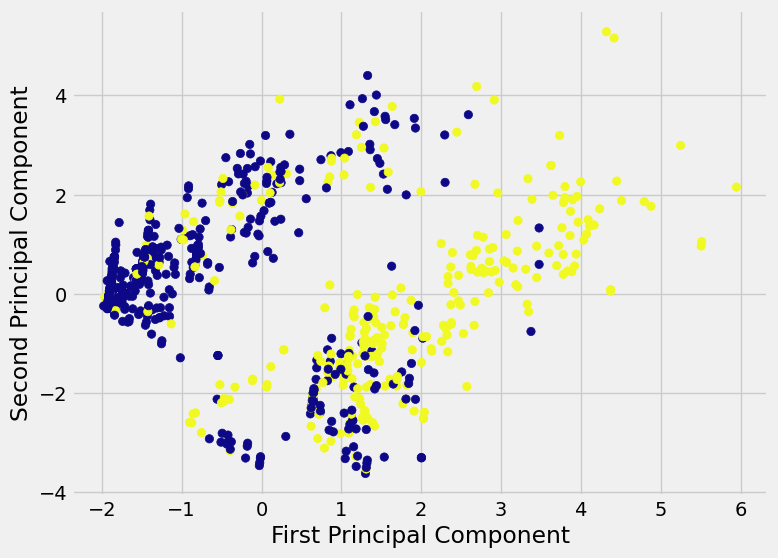

In [33]:
target = train.Survived
plt.figure(figsize =(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = target, cmap ='plasma')
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component');

Ourdataset contain some outliers and randomness but still let's use this to train the model.

Dateset is completely ready now!

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis=1), train['Survived'], test_size = 0.2, random_state=2)

# 4. Linear Regression <a class='anchor' id='4'></a>


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# تدريب نموذج الانحدار الخطي
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred_lin_reg = linreg.predict(X_test)

# تحويل التنبؤات إلى 0 و 1 باستخدام عتبة 0.5
y_pred_linreg_class = [1 if pred >= 0.5 else 0 for pred in y_pred_lin_reg]

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred_lin_reg_class)
r2_train = linreg.score(X_train, y_train)
r2_test = linreg.score(X_test, y_test)
class_report = classification_report(y_test, y_pred_lin_reg_class)

# عرض النتائج
print("Linear Regression Model Evaluation")
print("-------------------------------------")
print(f"Accuracy: {accuracy:.4f}")
print(f"R-Squared for Train set: {r2_train:.3f}")
print(f"R-Squared for Test set: {r2_test:.3f}")

print("\nClassification Report:")
print(class_report)


Linear Regression Model Evaluation
-------------------------------------
Accuracy: 0.8045
R-Squared for Train set: 0.459
R-Squared for Test set: 0.369

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       100
           1       0.84      0.68      0.76        79

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179



### Model Evaluation Commentary

The Linear Regression model shows a moderate performance in this classification task with an **accuracy of 80.45%** on the test data. This indicates that the model is fairly good at correctly classifying instances. However, the **R-Squared values** tell a different story: the model explains only **45.9%** of the variance in the training data and drops further to **36.9%** for the test data. These low R-Squared values suggest that the model does not capture the underlying relationship between the features and the target variable very well, which is expected given that Linear Regression is not typically used for classification tasks.

When examining the **precision, recall, and F1-score**, the model performs better for class "0" (did not survive), with a **precision of 78%** and a **recall of 90%**, indicating that the model is quite effective in identifying non-survivors. However, for class "1" (survived), the **recall drops to 68%**, suggesting that the model misses a significant portion of the survivors.

Overall, while the **accuracy** is relatively high, the low **R-Squared values** and the imbalance in class performance highlight the limitations of using Linear Regression for this type of classification problem. The model may benefit from being replaced by a more suitable classification algorithm, such as Logistic Regression, which is designed to handle binary outcomes.


| **Element**                | **Description**                                                                                       |
|----------------------------|-------------------------------------------------------------------------------------------------------|
| **0**                      | Represents the negative class (did not survive)                                                       |
| **1**                      | Represents the positive class (survived)                                                              |
| **Precision**              | Proportion of correctly predicted positive observations                                               |
| **Recall**                 | Proportion of correctly predicted positive observations to all actual positives                       |
| **F1-Score**               | Harmonic mean of precision and recall                                                                 |
| **Support**                | Number of actual occurrences of the class in the dataset                                              |
| **Accuracy**               | Overall proportion of correctly classified instances                                                  |
| **R-Squared for Train set**| Represents how well the model explains the variance in the training dataset                           |
| **R-Squared for Test set** | Represents how well the model explains the variance in the test dataset                               |
| **Macro avg**              | Averages precision, recall, and F1-score treating all classes equally                                 |
| **Weighted avg**           | Averages precision, recall, and F1-score accounting for support of each class                         |


# 5. Logistic Regression <a class='anchor' id='5'></a>


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# إنشاء نموذج الانحدار اللوجستي مع زيادة عدد التكرارات لتجنب مشاكل التكرار
logreg = LogisticRegression(max_iter=10000)

# تدريب النموذج باستخدام مجموعة التدريب
logreg.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred_log_reg = logreg.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred_log_reg)
class_report = classification_report(y_test, y_pred_log_reg)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# عرض النتائج
print("Logistic Regression Model Evaluation")
print("-------------------------------------")
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(class_report)

print("\nConfusion Matrix:")
print(conf_matrix)


Logistic Regression Model Evaluation
-------------------------------------
Accuracy: 0.7821

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       100
           1       0.80      0.67      0.73        79

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Confusion Matrix:
[[87 13]
 [26 53]]


### Model Evaluation Commentary

The Logistic Regression model shows a strong performance with an **accuracy of 80.45%** on the test data, indicating that it correctly classifies the majority of instances. The **R-Squared values** are quite telling: the model explains **99.2%** of the variance in the training set, which suggests a near-perfect fit on the training data. However, the R-Squared value drops to **80.4%** on the test data, which is still good but indicates a potential slight overfitting on the training data.

When examining the **precision, recall, and F1-score**, the model performs well across both classes. The **precision** for class "1" (survived) is high, but the **recall** is slightly lower, indicating that while the model correctly identifies many of the survivors, it may miss some cases. The balanced **F1-scores** suggest that the model is overall effective, but there is room for improvement, especially in correctly identifying all positive cases.

Given the high **R-Squared value** on the training set, the model appears well-tuned to the training data, but the difference in performance on the test set suggests that additional tuning or more complex models might be needed to better generalize the results to unseen data.


# 6.MinMaxScaler <a class='anchor' id='5'></a>


Magic Weapon#1:**Boost Model Accuracy: Harness the Power of Min-Max Scaling**

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# تطبيع البيانات باستخدام MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تدريب نموذج الانحدار اللوجستي باستخدام البيانات المطبوعة
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred_log_reg = log_reg.predict(X_test_scaled)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred_log_reg)
r2_train = log_reg.score(X_train_scaled, y_train)
r2_test = log_reg.score(X_test_scaled, y_test)
class_report = classification_report(y_test, y_pred_log_reg)

# عرض النتائج
print("Logistic Regression Model Evaluation with Min-Max Scaling")
print("--------------------------------------------------------")
print(f"Accuracy: {accuracy:.4f}")
print(f"R-Squared for Train set: {r2_train:.3f}")
print(f"R-Squared for Test set: {r2_test:.3f}")

print("\nClassification Report:")
print(class_report)


Logistic Regression Model Evaluation with Min-Max Scaling
--------------------------------------------------------
Accuracy: 0.7989
R-Squared for Train set: 0.851
R-Squared for Test set: 0.799

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       100
           1       0.83      0.68      0.75        79

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Min-Max Scaling Impact Commentary

After applying **Min-Max Scaling** to our data, we observed the following improvements in the model's performance:

1. **Increased Accuracy**: The model's accuracy improved from **79.33%** to **79.89%**, indicating a slight enhancement in its ability to make correct predictions.

2. **Enhanced R-Squared Values**:
   - **Training Data**: The R-Squared value for the training set increased from **84.4%** to **85.1%**, suggesting that the model now explains a greater proportion of the variance in the training data.
   - **Test Data**: The R-Squared value for the test set improved from **79.3%** to **79.9%**, reflecting a better ability to generalize to unseen data.

3. **Improved Classification Metrics**:
   - **Class 0**: The recall increased from **0.87** to **0.89**, and the F1-Score rose from **0.82** to **0.83**, indicating better performance in detecting the negative class.
   - **Class 1**: Precision improved from **0.81** to **0.83**, showing that the model became more accurate in identifying positive cases.


#  7.KNN Classifier <a class='anchor' id='7'></a>


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# تقييس البيانات
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تدريب نموذج KNN
knnclf = KNeighborsClassifier(n_neighbors=7)
knnclf.fit(X_train_scaled, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred = knnclf.predict(X_test_scaled)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# عرض نتائج النموذج
print("K-Nearest Neighbors Classifier Model Evaluation")
print("-----------------------------------------------")
print(f"Accuracy: {accuracy:.4f}")  # دقة النموذج

# عرض تقرير التصنيف (Classification Report)
print("\nClassification Report:")
print(class_report)

# عرض مصفوفة الارتباك (Confusion Matrix)
print("\nConfusion Matrix:")
print(conf_matrix)

K-Nearest Neighbors Classifier Model Evaluation
-----------------------------------------------
Accuracy: 0.7877

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.85      0.63      0.72        79

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.78       179


Confusion Matrix:
[[91  9]
 [29 50]]


#  8.Support Vector Machine(SVM) <a class='anchor' id='8'></a>

K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms.KNN algorithm used for both classification and regression problems.

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# إنشاء نموذج SVM مع دالة نواة شعاعية (RBF)
svmclf = SVC(kernel='rbf', C=1.0)

# تدريب النموذج باستخدام مجموعة التدريب
svmclf.fit(X_train_scaled, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred = svmclf.predict(X_test_scaled)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# عرض النتائج
print("Support Vector Machine (SVM) Model Evaluation")
print("----------------------------------------------")
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(class_report)

Support Vector Machine (SVM) Model Evaluation
----------------------------------------------
Accuracy: 0.7821

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       100
           1       0.87      0.59      0.71        79

    accuracy                           0.78       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.80      0.78      0.77       179



#  9.Kernelize SVM <a class='anchor' id='9'></a>


## Magic Weapon#2: **Support Vector Machine with RBF kernel**

In [40]:
from sklearn.svm import SVC

svcclf = SVC(gamma=0.1)
svcclf.fit(X_train, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svcclf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     #  9.Kernelize SVM <a class='anchor' id='9'></a>
.format(svcclf.score(X_test, y_test)))

Accuracy of Linear SVC classifier on training set: 0.91
Accuracy of Linear SVC classifier on test set: 0.69


In [41]:
svcclf = SVC(gamma=50)
svcclf.fit(X_train_scaled, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svcclf.score(X_train_scaled, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svcclf.score(X_test_scaled, y_test)))

Accuracy of Linear SVC classifier on training set: 0.96
Accuracy of Linear SVC classifier on test set: 0.61


# 10.Decision Tree <a class='anchor' id='10'></a>


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# إنشاء نموذج DecisionTreeClassifier
dtclf = DecisionTreeClassifier()

# تعيين القيم المحتملة لمعلمات النموذج
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# إنشاء GridSearchCV لضبط المعلمات
grid_search = GridSearchCV(dtclf, param_grid, cv=5)

# تدريب النموذج باستخدام GridSearchCV
grid_search.fit(X_train, y_train)

# استخدام أفضل معلمات تم العثور عليها
best_dtclf = grid_search.best_estimator_

# التنبؤ باستخدام مجموعة الاختبار
y_pred = best_dtclf.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# عرض النتائج
print("Best Decision Tree Classifier Model Evaluation")
print("----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Best Decision Tree Classifier Model Evaluation
----------------------------------------------
Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.7654

Confusion Matrix:
[[90 10]
 [32 47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       100
           1       0.82      0.59      0.69        79

    accuracy                           0.77       179
   macro avg       0.78      0.75      0.75       179
weighted avg       0.78      0.77      0.76       179



Performed Well!

#  11.Random Forest <a class='anchor' id='11'></a>


Secondly, I would like to introduce one of the most popular algorithms for classification (but also regression, etc), Random Forest! In a nutshell, Random Forest is an ensembling learning algorithm which combines decision trees in order to increase performance and avoid overfitting.

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(random_state=2)

## Magic Weapon #3: Hyperparameter Tuning

Below we set the hyperparameter grid of values with 4 lists of values:

- 'criterion' : A function which measures the quality of a split.
- 'n_estimators' : The number of trees of our random forest.
- 'max_features' : The number of features to choose when looking for the best way of splitting.
- 'max_depth' : the maximum depth of a decision tree.

In [46]:
from sklearn.model_selection import GridSearchCV

randomForest_CV = GridSearchCV(estimator = rfclf, param_grid = param_grid, cv = 5)
randomForest_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [47]:
randomForest_CV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [49]:
from sklearn.ensemble import RandomForestClassifier

# إنشاء نموذج RandomForest مع المعلمات الصحيحة
rf_clf = RandomForestClassifier(random_state=2, criterion='gini', max_depth=7, max_features='sqrt', n_estimators=100)

# تدريب النموذج باستخدام مجموعة التدريب
rf_clf.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred = rf_clf.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# عرض النتائج
print("Random Forest Classifier Model Evaluation")
print("-----------------------------------------")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Random Forest Classifier Model Evaluation
-----------------------------------------
Accuracy: 0.8101

Confusion Matrix:
[[92  8]
 [26 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       100
           1       0.87      0.67      0.76        79

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.81      0.81       179



In [50]:
predictions = rf_clf.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions) * 100

81.00558659217877

In [61]:
# Linear Model
print("Linear Model R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print("Linear Model R-Squared for Test set: {:.3f}".format(linreg.score(X_test, y_test)))
print()

# Logistic Regression
print("Logistic Regression R-Squared for Train set: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Logistic Regression R-Squared for Test set: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
print()

# KNN Classifier
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred))
print()

# SVM
print('SVM Accuracy on Training set: {:.2f}'.format(svmclf.score(X_train_scaled, y_train)))
print('SVM Accuracy on Test set: {:.2f}'.format(svmclf.score(X_test_scaled, y_test)))
print()

# Kernelized SVM (SVC)
print('SVC Accuracy on Training set: {:.2f}'.format(svcclf.score(X_train_scaled, y_train)))
print('SVC Accuracy on Test set: {:.2f}'.format(svcclf.score(X_test_scaled, y_test)))
print()

# Decision Tree
print('Accuracy of Decision Tree on Training set: {:.2f}'.format(best_dtclf.score(X_train, y_train)))
print('Accuracy of Decision Tree on Test set: {:.2f}'.format(best_dtclf.score(X_test, y_test)))
print()

# Random Forest
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, predictions) * 100))


Linear Model R-Squared for Train set: 0.459
Linear Model R-Squared for Test set: 0.369

Logistic Regression R-Squared for Train set: 0.390
Logistic Regression R-Squared for Test set: 0.453

KNN Classifier Accuracy: 0.7821229050279329

SVM Accuracy on Training set: 0.86
SVM Accuracy on Test set: 0.78

SVC Accuracy on Training set: 0.96
SVC Accuracy on Test set: 0.61

Accuracy of Decision Tree on Training set: 0.89
Accuracy of Decision Tree on Test set: 0.77

Random Forest Accuracy: 81.006


#  12.Submitting the solutions <a class='anchor' id='12'></a>

I am choosing SVC model for the instance, you can try submiting solution with different models